<a href="https://colab.research.google.com/github/chayanbasu007/td_cross_sell_model/blob/main/TD_Cross_Sell_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the Necessary Libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_column',None)

###Uploading the data csv

In [151]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


#####Ignore Warnings

In [152]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [153]:
df = pd.read_csv('train.csv',sep =';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 📊 Bank Client Data — Column Descriptions

####Summary
- The data is related with direct marketing campaigns of a Portuguese banking institution.
- The marketing campaigns were based on phone calls.
- Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

####Campaign Duration
**May 2008 to November 2010**

#### 💼 Client Demographics
- **age** *(numeric)*: Age of the client
- **job** *(categorical)*: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services"
- **marital** *(categorical)*: "married", "divorced", "single"
- **education** *(categorical)*: "unknown", "secondary", "primary", "tertiary"
    1.   **Primary**- basic.4y, basic.6y
    2.   **Secondary**- basic.9y, high.school, professional.course
    3.   **Tertiary** - university.degree
- **default** *(binary)*: "yes", "no"
- **balance** *(numeric)*: Average yearly balance (in euros)
- **housing** *(binary)*: "yes", "no"
- **loan** *(binary)*: "yes", "no"

#### 📞 Contact Information
- **contact** *(categorical)*: "unknown", "telephone", "cellular"
- **day** *(numeric)*: Day of last contact
- **month** *(categorical)*: "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"
- **duration** *(numeric)*: Duration of last contact (in seconds)

#### 🔁 Campaign Details
- **campaign** *(numeric)*: Number of contacts during this campaign
- **pdays** *(numeric)*: Days since last contact in a previous campaign
- **previous** *(numeric)*: Number of contacts before this campaign
- **poutcome** *(categorical)*: "unknown", "other", "failure", "success"

#### 🎯 Target Variable
- **y** *(binary)*: "yes", "no"

### Shape of the dataframe

In [154]:
df.shape

(45211, 17)

There are 45211 rows and 17 columns.
- 16 feature columns
- 1 target column

### Check for missing values

In [155]:
df.isna().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Although it shows there are no missing values still some categorical columns have missing unknown categories.

### Percentage of Clients Contacted Across Job Profile

,job,count,percent,cum_count,cum_percent
0,blue-collar,9732,21.5,9732,21.5
1,management,9458,20.9,19190,42.4
2,technician,7597,16.8,26787,59.2
3,admin.,5171,11.4,31958,70.7
4,services,4154,9.2,36112,79.9
5,retired,2264,5.0,38376,84.9
6,self-employed,1579,3.5,39955,88.4
7,entrepreneur,1487,3.3,41442,91.7
8,unemployed,1303,2.9,42745,94.5
9,housemaid,1240,2.7,43985,97.3


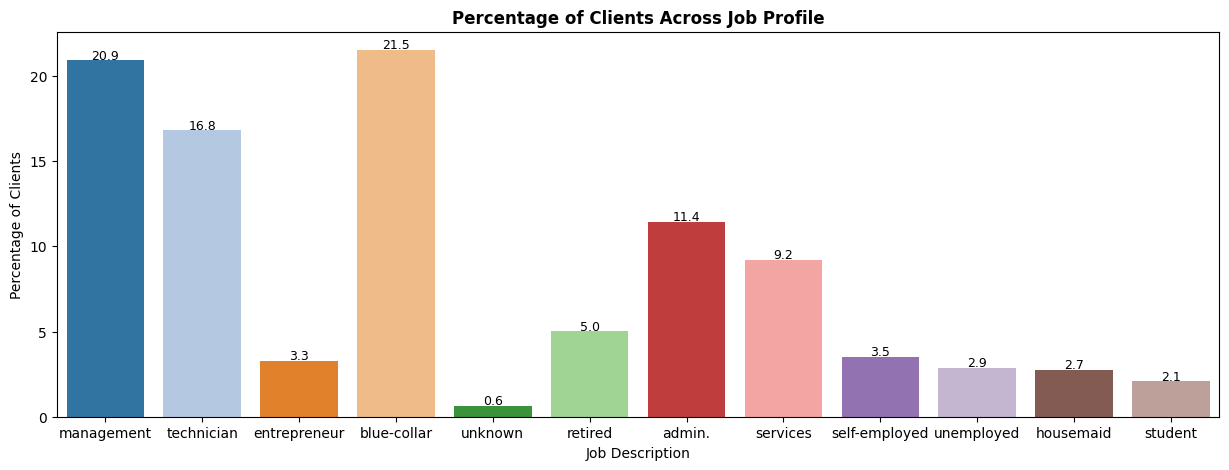

In [156]:
job_df = df['job'].value_counts().reset_index()
job_df['percent'] = ((job_df['count']/job_df['count'].sum())*100).round(1)
job_df['cum_count'] = job_df['count'].cumsum()
job_df['cum_percent'] = ((job_df['cum_count']/job_df['count'].sum())*100).round(1)
display(job_df)

#Overall Breakup
fig,axes = plt.subplots(1,1,figsize =(15,5))
sns.countplot(data=df, x='job',stat= 'percent', ax= axes, palette = 'tab20')
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.08,
                f'{height:.1f}', ha='center', fontsize=9)
axes.set_ylabel("Percentage of Clients")
axes.set_xlabel("Job Description")
axes.set_title("Percentage of Clients Across Job Profile", fontweight ='bold')

plt.show()

Percentage breakup of the Job Profile of the clients who were contacted by the Bank for TD during the campaign.
 - Majority of the people contacted are from Management,technician, blue-collar, administrators or in services.
 - Together these group comprise of 80% of the clients that were contacted during this marketing campaign.
 - 21.5% of clients have blue-collar jobs
 - 20.9% have management jobs
 - 16.8% are technicians
 - 11.4% are administrators and 9.2% are in services

### Percentage of Clients Contacted Across Martital Status

,marital,count
0,married,27214
1,single,12790
2,divorced,5207


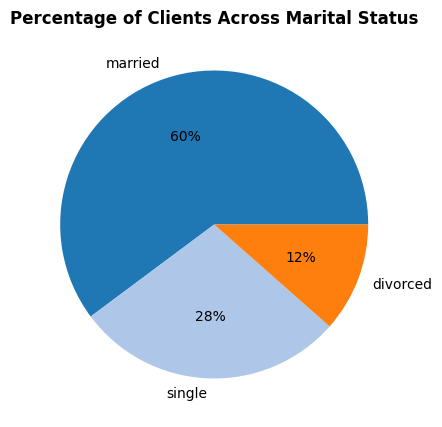

In [157]:
marital_df = df['marital'].value_counts().reset_index()
display(marital_df)

plt.figure(figsize=(5,5))
colors = sns.color_palette('tab20')
plt.pie(data = marital_df, x='count', labels =marital_df['marital'],colors= colors, autopct='%.0f%%')
plt.title("Percentage of Clients Across Marital Status", fontweight ='bold')
plt.show()

Across Marital Status,
- 60% of the clients were married
- 28% are single
- 12% are divorced

### Percentage of Clients Contacted Across Martital Status

,education,count,percent
0,unknown,1857,4.1
1,primary,6851,15.2
2,tertiary,13301,29.4
3,secondary,23202,51.3


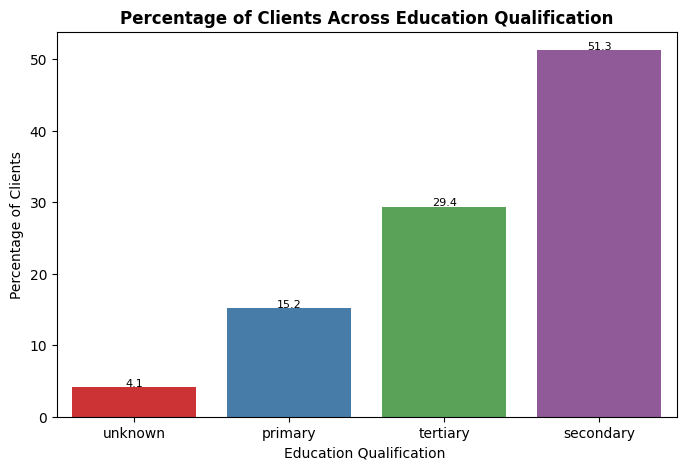

In [158]:
education_df = df['education'].value_counts().sort_values().reset_index()
education_df['percent'] = ((education_df['count']/education_df['count'].sum())*100).round(1)
display(education_df)

#Overall Breakup
fig,axes = plt.subplots(1,1,figsize =(8,5))
sns.barplot(data=education_df, x='education',y= 'percent', ax= axes, palette = 'Set1')
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                f'{height:.1f}', ha='center', fontsize=8)
plt.ylabel("Percentage of Clients")
plt.xlabel("Education Qualification ")
plt.title("Percentage of Clients Across Education Qualification", fontweight ='bold')
plt.show()

Across Educational Qualification,
- Highest number of clients contacted have passed secondary level of education
- Second highest number of clients contacted have passed tertiary level of education
- 15.2% clients contacted have passed primary level of education
- Education Qualification of 4.1% clients still remain unknown.





### Percentage of Clients Contacted Across Credit Defaulters

,default,count
0,no,44396
1,yes,815


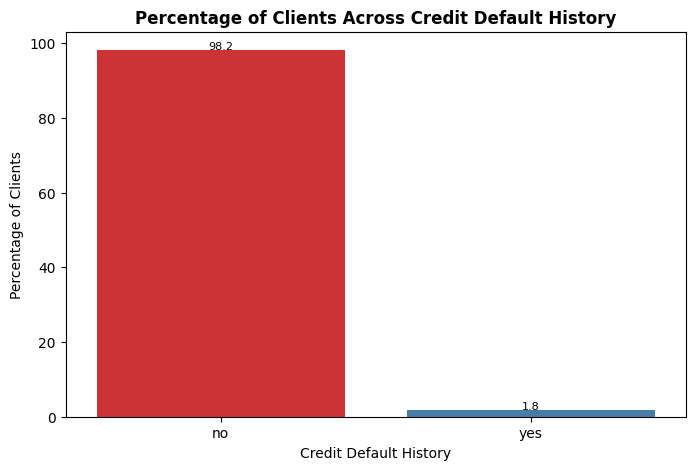

In [159]:
#Table
display(df['default'].value_counts().reset_index())

#Figure
fig,axes = plt.subplots(1,1,figsize =(8,5))
sns.countplot(data=df, x='default', stat= 'percent', ax= axes, palette = 'Set1')
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                f'{height:.1f}', ha='center', fontsize=8)

plt.ylabel("Percentage of Clients")
plt.xlabel("Credit Default History")
plt.title("Percentage of Clients Across Credit Default History", fontweight ='bold')
plt.show()

Only 1.8% clients contacted by the bank has a credit default history

### Percentage of Clients Contacted Across Mortgage Holders

,housing,count
0,yes,25130
1,no,20081


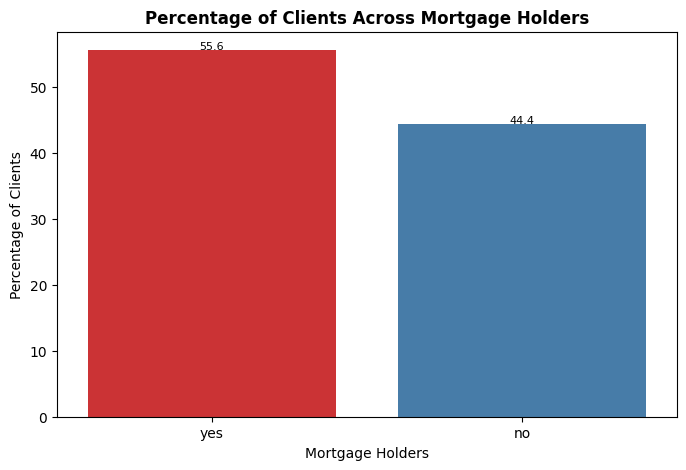

In [160]:
#Table
display(df['housing'].value_counts().reset_index())

#Figure
fig,axes = plt.subplots(1,1,figsize =(8,5))
sns.countplot(data=df, x='housing', stat= 'percent', ax= axes, palette = 'Set1')
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                f'{height:.1f}', ha='center', fontsize=8)

plt.ylabel("Percentage of Clients")
plt.xlabel("Mortgage Holders")
plt.title("Percentage of Clients Across Mortgage Holders", fontweight ='bold')
plt.show()


- 55.6% clients contacted by the bank have Mortgage whereas 44.4% customers don't have a mortgage.

### Percentage of Clients Contacted Across Personal Loan Holders

,loan,count
0,no,37967
1,yes,7244


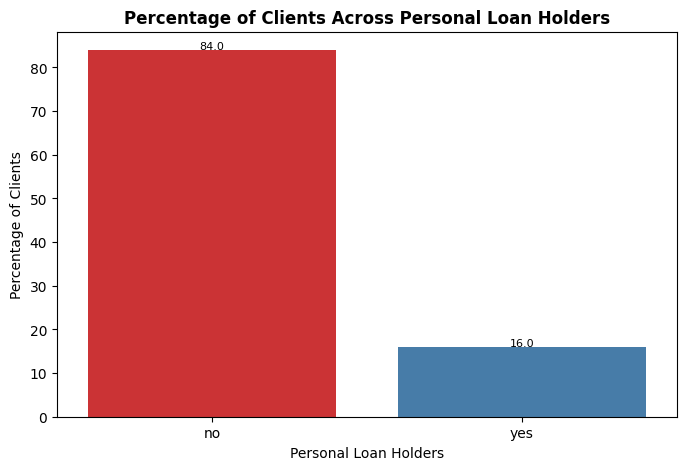

In [161]:
#Table
display(df['loan'].value_counts().reset_index())

#Figure
fig,axes = plt.subplots(1,1,figsize =(8,5))
sns.countplot(data=df, x='loan', stat= 'percent', ax= axes, palette = 'Set1')
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                f'{height:.1f}', ha='center', fontsize=8)

plt.ylabel("Percentage of Clients")
plt.xlabel("Personal Loan Holders")
plt.title("Percentage of Clients Across Personal Loan Holders", fontweight ='bold')
plt.show()

Only 16% of customers have a Personal Loan while the rest don't.

### Percentage of Clients Contacted With Minimum One Loan

,housing,loan,count,percent,cum_count,cum_percent
0,no,no,17204,38.1,17204,38.1
1,no,yes,2877,6.4,20081,44.4
2,yes,no,20763,45.9,40844,90.3
3,yes,yes,4367,9.7,45211,100.0


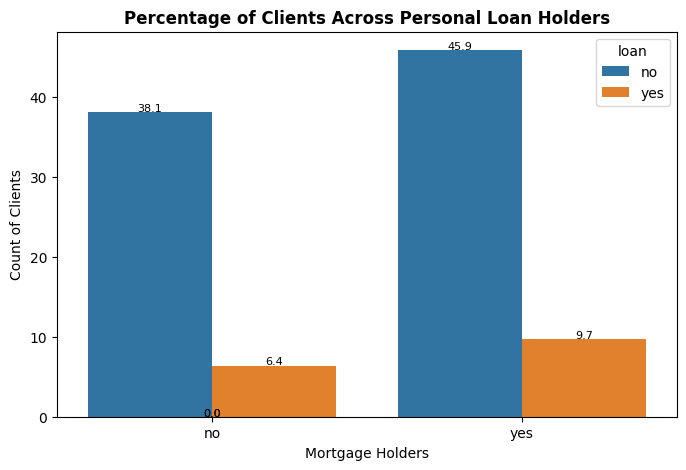

In [162]:
#Table
loan_df = df.groupby(['housing','loan']).size().reset_index()
loan_df.rename(columns= {0:'count'}, inplace= True)

loan_df['percent'] = ((loan_df['count']/loan_df['count'].sum())*100).round(1)
loan_df['cum_count'] = loan_df['count'].cumsum()
loan_df['cum_percent'] = ((loan_df['cum_count']/loan_df['count'].sum())*100).round(1)

display(loan_df)

#Figure
fig,axes = plt.subplots(1,1,figsize =(8,5))
sns.barplot(data =loan_df, x= 'housing', y='percent', hue ='loan', ax =axes)
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                f'{height:.1f}', ha='center', fontsize=8)

plt.ylabel("Count of Clients")
plt.xlabel("Mortgage Holders")
plt.title("Percentage of Clients Across Personal Loan Holders", fontweight ='bold')
plt.show()

- 38.1% clients do not hold any kind of loan.
- Rest 61.9% clients hold atleast one kind of loan (either HL or PL or both).
- 6.4% clients hold only Personal Loans
- 45.9% clients hold only Mortgages
- 9.7% clients hold both Mortgage and Personal Loans

### Percentage of Clients Contacted across Mode of Contact

,contact,count
0,cellular,29285
1,unknown,13020
2,telephone,2906


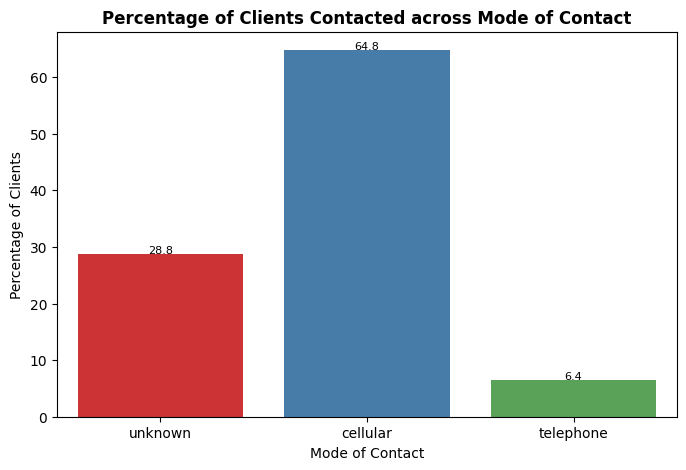

In [163]:
#Table
display(df['contact'].value_counts().reset_index())

#Figure
fig,axes = plt.subplots(1,1,figsize =(8,5))
sns.countplot(data=df, x='contact', stat= 'percent', ax= axes, palette = 'Set1')
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                f'{height:.1f}', ha='center', fontsize=8)

plt.ylabel("Percentage of Clients")
plt.xlabel("Mode of Contact")
plt.title("Percentage of Clients Contacted across Mode of Contact", fontweight ='bold')
plt.show()

- 64.8% clients were contacted by device where as 6.4% clients were contacted by Telephone.
- Mode of Contact remains unknown for 28.8% clients.

### Percentage of Clients Contacted across Months

,month,count,percent
0,may,13766,30.4
1,jul,6895,15.3
2,aug,6247,13.8
3,jun,5341,11.8
4,nov,3970,8.8
5,apr,2932,6.5
6,feb,2649,5.9
7,jan,1403,3.1
8,oct,738,1.6
9,sep,579,1.3


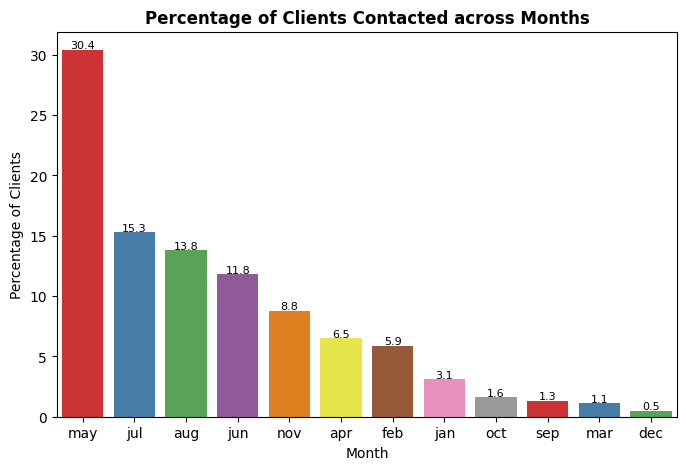

In [170]:
#Table
month_df = df['month'].value_counts().reset_index()
month_df.sort_values(by='count', ascending = False)
month_df['percent'] = ((month_df['count']/month_df['count'].sum())*100).round(1)
display(month_df)

#Figure
fig,axes = plt.subplots(1,1,figsize =(8,5))
sns.barplot(data=month_df, x='month', y= 'percent', ax= axes, palette = 'Set1')
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                f'{height:.1f}', ha='center', fontsize=8)

plt.ylabel("Percentage of Clients")
plt.xlabel("Month")
plt.title("Percentage of Clients Contacted across Months", fontweight ='bold')
plt.show()

Majority of the clients were contacted in mid year.
- 30.4% clients were contacted in May.
- 15.3% clients were contacted in Jul.
- 13.8% clients were contacted in Aug.
- 11.8% clients were contacted in Jun.
- 8.8% clients were contacted in Nov.

Lowest percentage of clients contacted were in Dec which is around 0.5%.
